#### Problem Statement

Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance. I will be usign a step-by-step systematic approach using a method that could be used for a variety of ML problems. This project would fall under what is commonly known as "HR Anlytics", "People Analytics".
        
#### Load Libraries

In [1]:
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, binarize, LabelEncoder

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, accuracy_score

# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

# Warnings
import warnings as ws
ws.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [2]:
# Load Dataset
data_hr = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### Data Description and Exploratory Visualisations

In this section, we will provide data visualizations that summarizes or extracts relevant characteristics of features in our dataset. Let's look at each column in detail, get a better understanding of the dataset, and group them together when appropriate.

In [3]:
print( 'DataSet Shape {}'.format(data_hr.shape))

data_hr.columns

DataSet Shape (1470, 35)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# Summary
def summary(data):
    df = {
     'Count' : data.shape[0],
     'NA values' : data.isna().sum(),
     '% NA' : round((data.isna().sum()/data.shape[0]) * 100, 2),
     'Unique' : data.nunique(),
     'Dtype' : data.dtypes
    } 
    return(pd.DataFrame(df))

print('Shape is :', data_hr.shape)
summary(data_hr)

Shape is : (1470, 35)


,Count,NA values,% NA,Unique,Dtype
Age,1470,0,0.0,43,int64
Attrition,1470,0,0.0,2,object
BusinessTravel,1470,0,0.0,3,object
DailyRate,1470,0,0.0,886,int64
Department,1470,0,0.0,3,object
DistanceFromHome,1470,0,0.0,29,int64
Education,1470,0,0.0,5,int64
EducationField,1470,0,0.0,6,object
EmployeeCount,1470,0,0.0,1,int64
EmployeeNumber,1470,0,0.0,1470,int64


Here there is no missing value.  **EmployeeCount, Over18, StandardHours** has only one value and **EmployeeNumber** is nothing but ID. So that we can drop those columns.

In [5]:
data = data_hr.copy()
data.drop(['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'], axis = 1, inplace = True)

In [6]:
num_var = [var for var in data if data[var].dtypes != 'O']
cat_var = [var for var in data if data[var].dtypes == 'O']

##### 1. Numerical Variables 

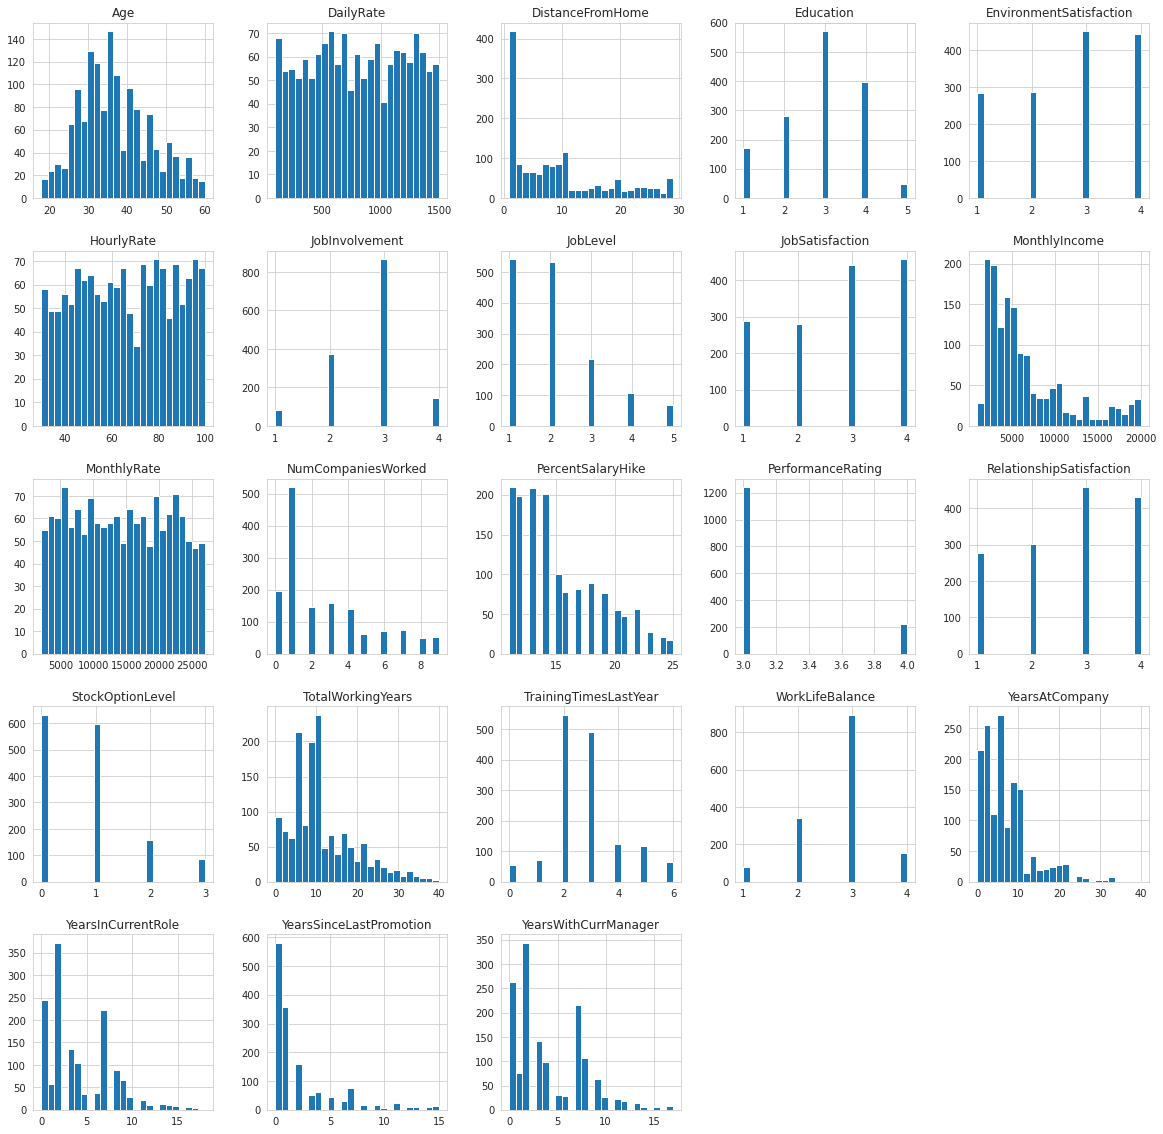

In [7]:
data[num_var].hist(bins = 25, figsize = (20,20))
plt.show()

A few observations can be made based on the information and histograms for numerical features:

1. Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.

2. Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.

3. EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.

4. Employee Number is likely to be a unique identifier for employees given the feature's quasi-uniform distribution.

Here we can split continuous and discrete value for further analysis

In [8]:
cont_var = [var for var in num_var if len(data[var].unique()) > 10]
disc_var = [var for var in num_var if len(data[var].unique()) <= 10]

##### a.continuous variable

Let's create a kernel density estimation (KDE) plot colored by the value of the target.

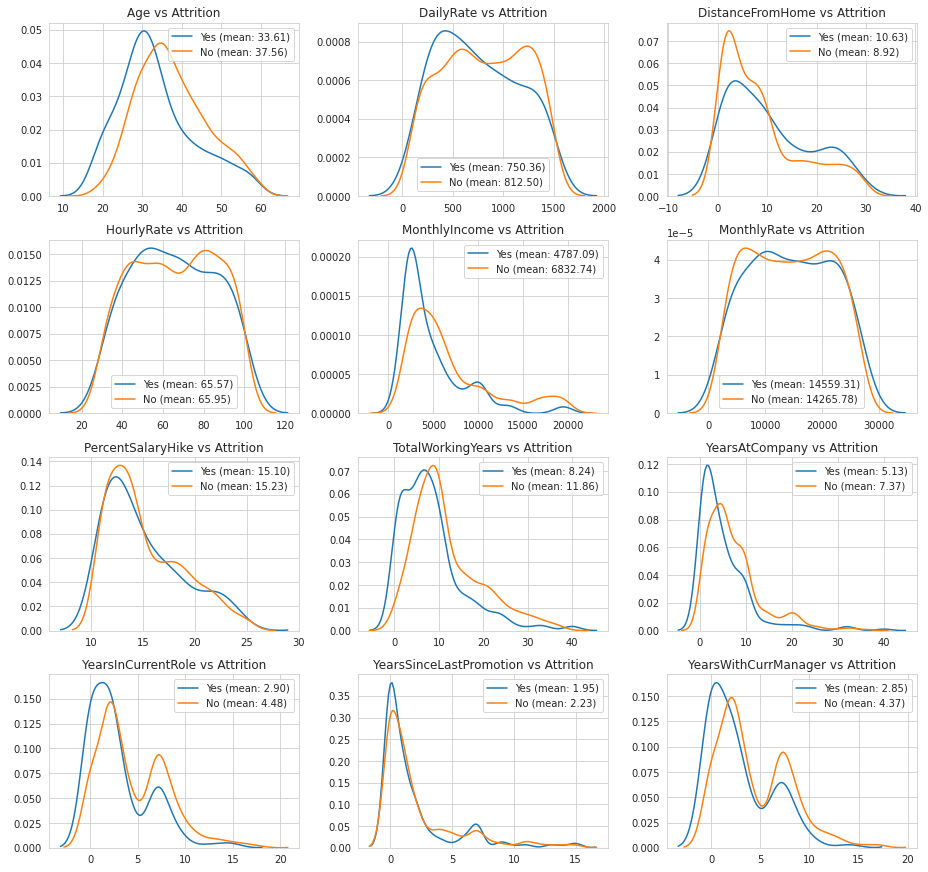

In [9]:
plt.figure(figsize = (13,15))
i = 0
for cont in cont_var:
    
    mu_yes = data[cont][data['Attrition'] == 'Yes'].mean()
    mu_no = data[cont][data['Attrition'] == 'No'].mean()
    
    plt.subplot(5,3,i+1)
    sns.kdeplot(data[cont][data['Attrition'] == 'Yes'], label = 'Yes (mean: {:.2f})'.format(mu_yes))
    sns.kdeplot(data[cont][data['Attrition'] == 'No'], label = 'No (mean: {:.2f})'.format(mu_no))
    plt.tight_layout()
    plt.title('{} vs Attrition'.format(cont))
    i+=1
plt.show()

##### b. Discreate Variable

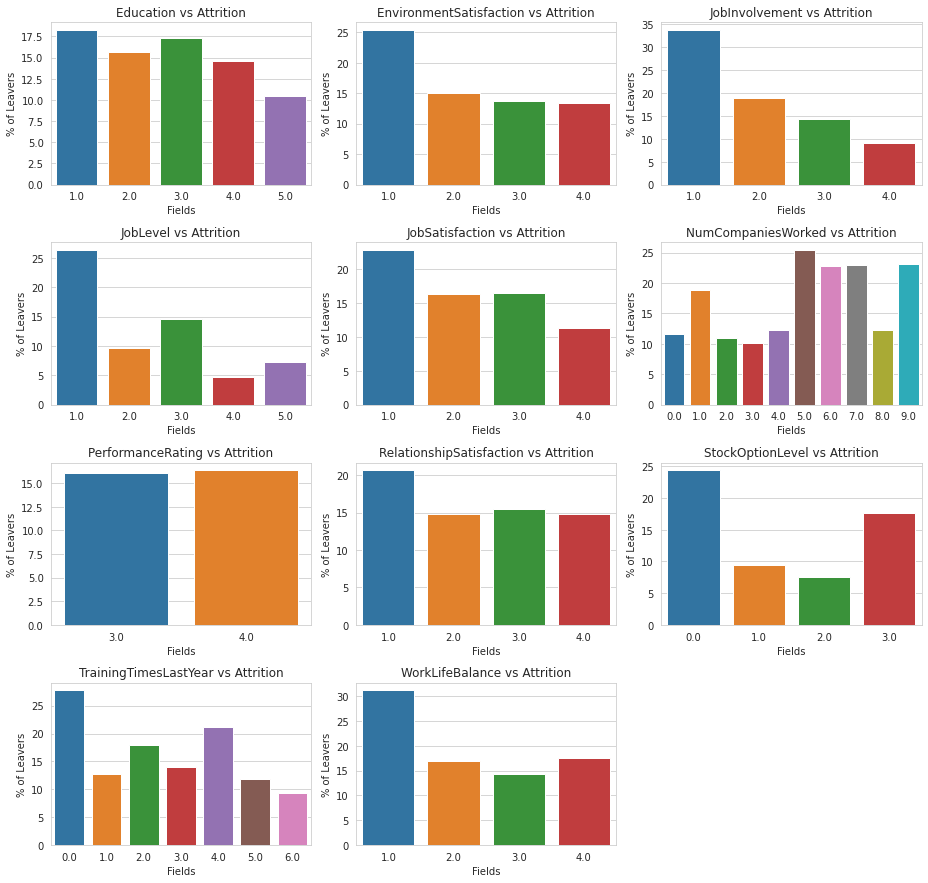

In [10]:
plt.figure(figsize = (13,15))
i = 0
for disc in disc_var:
    
    j=0
    col = ['Fields', '% of Leavers']
    df_field = pd.DataFrame(columns = col)
    
    for field in list(data[disc].unique()):    
        ratio = data[(data[disc] == field ) & (data['Attrition'] == 'Yes')].shape[0]/data[data[disc] == field].shape[0]
        df_field.loc[j] = [field, ratio * 100]
        j+=1
    
    plt.subplot(5,3,i+1)
    sns.barplot(x = 'Fields', y = '% of Leavers', data = df_field)
    plt.tight_layout()
    plt.title('{} vs Attrition'.format(disc))
    i+=1
plt.show()

#### 2. Categorical Variables  

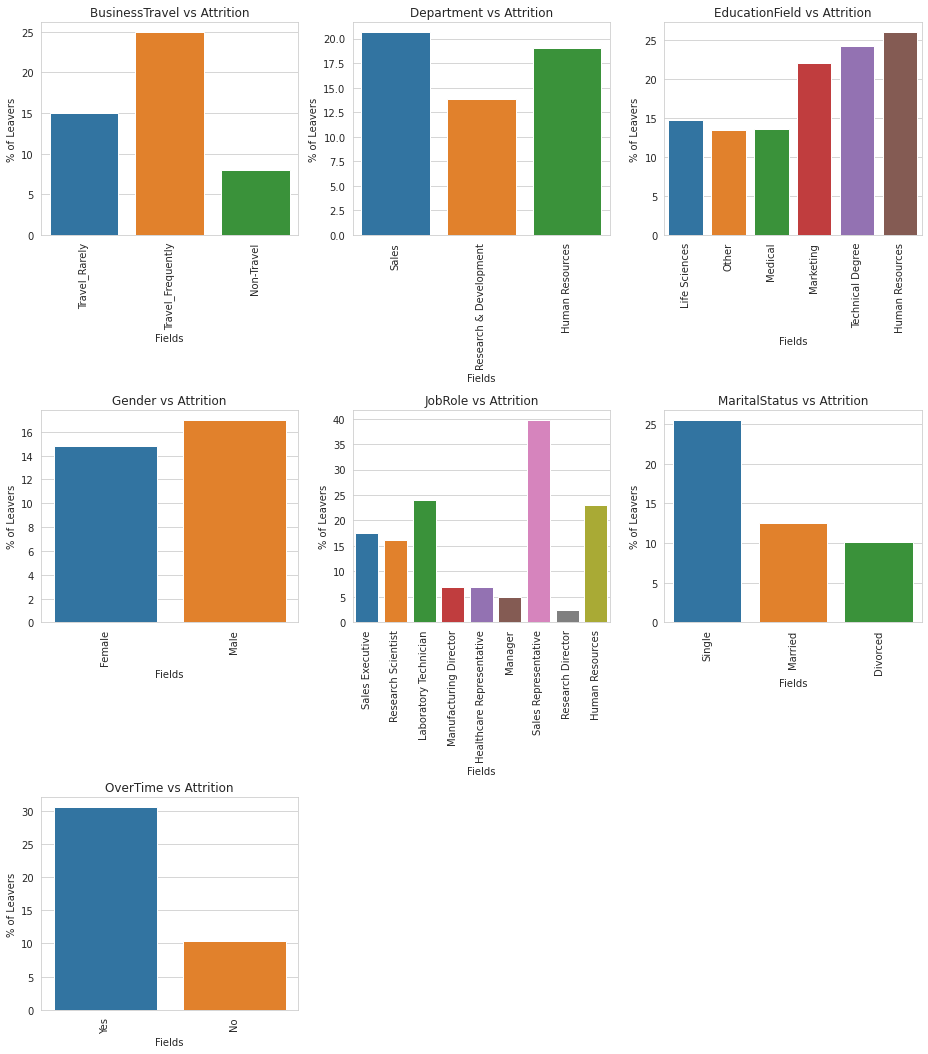

In [11]:
plt.figure(figsize = (13,25))
i = 0
for cat in cat_var[1:]:
    
    j=0
    col = ['Fields', '% of Leavers']
    df_field = pd.DataFrame(columns = col)
    
    for field in list(data[cat].unique()):    
        ratio = data[(data[cat] == field ) & (data['Attrition'] == 'Yes')].shape[0]/data[data[cat] == field].shape[0]
        df_field.loc[j] = [field, ratio * 100]
        j+=1
    
    plt.subplot(5,3,i+1)
    sns.barplot(x = 'Fields', y = '% of Leavers', data = df_field)
    plt.tight_layout()
    plt.xticks(rotation = 90)
    plt.title('{} vs Attrition'.format(cat))
    i+=1
plt.show()

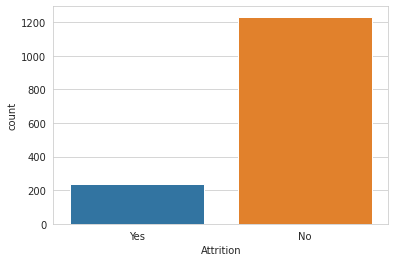

In [12]:
# Attrition Rate
sns.countplot(x = 'Attrition', data = data)

#### 3. Correlation
Let's take a look at some of most significant correlations. It is worth remembering that correlation coefficients only measure linear correlations.

In [13]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [14]:
data['Target'] = data['Attrition'].replace({'No':0,'Yes':1})

# Find correlations with the target and sort
corr = data.corr()['Target'].sort_values()

print('-'*25)
print('Top 5 Positive Correlation')
print('-'*25)
print(corr.tail(5))

print('-'*25)
print('Top 5 Negative Correlation')
print('-'*25)
print(corr.head(5))

-------------------------
Top 5 Positive Correlation
-------------------------
PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64
-------------------------
Top 5 Negative Correlation
-------------------------
TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


[]

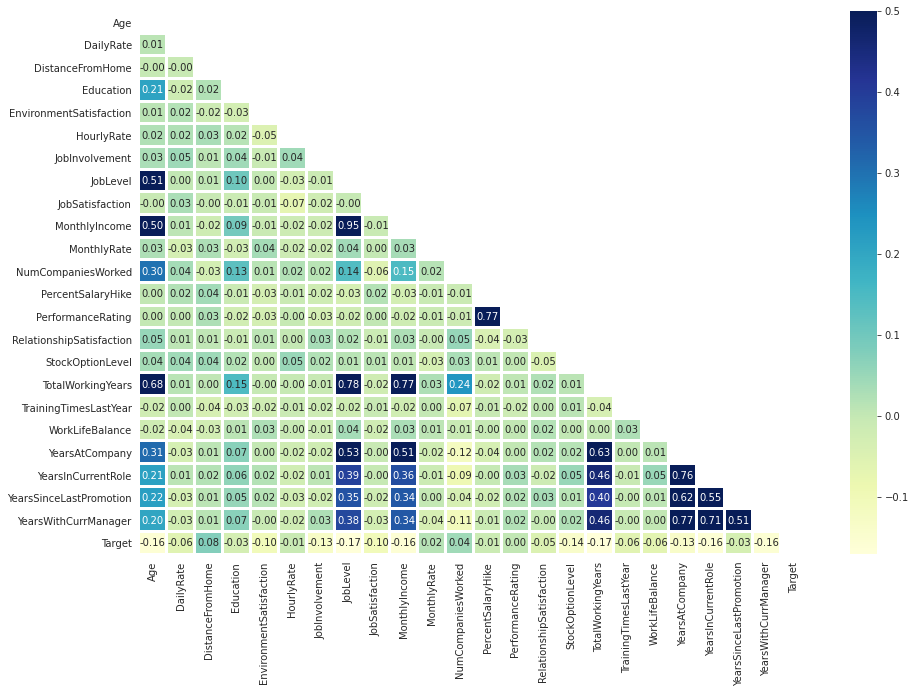

In [15]:
# Correlation Map
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask, linewidths = 2, cmap="YlGnBu", vmax = 0.5 )
plt.plot()

In [16]:
data.drop('Target',axis = 1, inplace = True)

### EDA Concluding Remarks


Let's summarise the findings from this EDA:

* The dataset does not feature any missing or erroneous data values, and all features are of the correct data type.
* The strongest positive correlations with the target features are: Performance Rating, Monthly Rate, Num Companies Worked, Distance From Home.
3. The strongest negative correlations with the target features are: Total Working Years, Job Level, Years In Current Role, and Monthly Income.
4. The dataset is imbalanced with the majoriy of observations describing Currently Active Employees.
5. Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18.
6. Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts.
* Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to their counterparts.
9. People who live further away from their work show higher proportion of leavers compared to their counterparts.
10. People who travel frequently show higher proportion of leavers compared to their counterparts.
11. People who have to work overtime show higher proportion of leavers compared to their counterparts.
12. Employee who work as Sales Representatives show a significant percentage of Leavers in the submitted dataset.
13. Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.


### Pre-processing Pipeline

#### Encoding

Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding becomes necessary as they encode categorical labels with numerical values. To avoid introducing feature importance for categorical features with large numbers of unique values, we will use both Lable Encoding and One-Hot Encoding as shown below.

###### 1. Label Encoding

In [17]:
label_var = [var for var in cat_var if len(data[var].unique()) <=2]

le = LabelEncoder()
for label in label_var:
    data[label] = le.fit_transform(data[label])
    
print('{} columns were Label Encoded'.format(label_var))

['Attrition', 'Gender', 'OverTime'] columns were Label Encoded


##### 2. OneHotEncoding 

In [18]:
data = pd.get_dummies(data, drop_first = True)
print('Shape of the data is {}'.format(data.shape))

Shape of the data is (1470, 45)


In [19]:
# Scaling Data (MinMaxScaler)
scale = MinMaxScaler(feature_range = (0,5))
HR_col = list(data.columns)
HR_col.remove('Attrition')
for col in HR_col:
    data[col] = data[col].astype(float)
    data[[col]] = scale.fit_transform(data[[col]])
data['Attrition'] = pd.to_numeric(data['Attrition'], downcast='float')
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,1.666667,0.0,4.571429,3.333333,1.25,5.000000,1.312270,3.490263,4.444444,5.0,0.000000,0.0,0.000000,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,3.333333,5.0,2.214286,1.666667,1.25,1.666667,1.085045,4.580004,0.555556,0.0,4.285714,5.0,5.000000,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,5.000000,5.0,4.428571,1.666667,0.00,3.333333,0.284623,0.060630,3.333333,5.0,1.428571,0.0,1.666667,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,5.000000,0.0,1.857143,3.333333,0.00,3.333333,0.500263,4.229070,0.555556,5.0,0.000000,0.0,3.333333,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.000000,5.0,0.714286,3.333333,0.00,1.666667,0.647446,2.918691,5.000000,0.0,0.357143,0.0,5.000000,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


#### Spliting Dataset into Train and Test sets

In [20]:
X = data.drop('Attrition', axis = 1)
Y = data['Attrition']

In [21]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 7)

print('X_Train Shape : {}'.format(x_train.shape))
print('X_Test Shape : {}'.format(x_test.shape))
print('Y_Train Shape : {}'.format(y_train.shape))
print('Y_Test Shape : {}'.format(y_test.shape))

X_Train Shape : (1102, 44)
X_Test Shape : (368, 44)
Y_Train Shape : (1102,)
Y_Test Shape : (368,)


### Base Line Model

Let's first use a range of baseline algorithms (using out-of-the-box hyper-parameters) before we move on to more sophisticated solutions. The algorithms considered in this section are: Logistic Regression, Random Forest, SVM, KNN, Decision Tree Classifier

In [22]:
models = []
models.append(('LR',LogisticRegression(class_weight = 'balanced')))
models.append(('RF',RandomForestClassifier(n_estimators=100, random_state=42, class_weight = 'balanced')))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state=7)))

Let's evaluate each model in turn and provide accuracy and standard deviation scores

In [23]:
acc_score = []
auc_score = []
names = []

col = ['Model', 'ROC AUC Mean','ROC AUC Std', 'ACC Mean','ACC Std']
result = pd.DataFrame(columns = col)

i = 0
for name, model in models:
    kfold = StratifiedKFold(n_splits = 5, random_state = 42)
    cv_acc_score = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')
    cv_auc_score = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'roc_auc')
    
    acc_score.append(cv_acc_score)
    auc_score.append(cv_auc_score)
    names.append(name)
    
    result.loc[i] = [name,cv_auc_score.mean(), cv_auc_score.std(), cv_auc_score.mean(), cv_auc_score.std()]
    i+=1

result = result.sort_values('ROC AUC Mean', ascending = False)
result

,Model,ROC AUC Mean,ROC AUC Std,ACC Mean,ACC Std
0,LR,0.834457,0.024626,0.834457,0.024626
1,RF,0.797567,0.045416,0.797567,0.045416
2,SVM,0.770047,0.042257,0.770047,0.042257
3,KNN,0.665717,0.024728,0.665717,0.024728
4,DT,0.599205,0.036289,0.599205,0.036289


Classification Accuracy is the number of correct predictions made as a ratio of all predictions made.
It is the most common evaluation metric for classification problems. However, it is often misused as it is only really suitable when there are an equal number of observations in each class and all predictions and prediction errors are equally important. It is not the case in this project, so a different scoring metric may be more suitable.

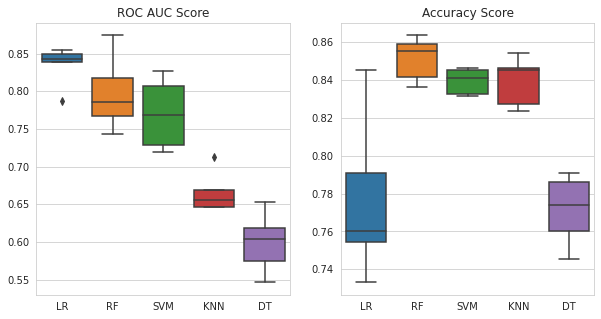

In [24]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(x = names, y = auc_score)
plt.title('ROC AUC Score')

plt.subplot(1,2,2)
sns.boxplot(x = names, y = acc_score)
plt.title('Accuracy Score')
plt.show()

Based on our ROC AUC comparison analysis, Logistic Regression and Random Forest show the highest mean AUC scores. We will shortlist these two algorithms for further analysis. See below for more details on these two algos.

In [25]:
# Normalized Confusion Matrix
def get_norm_cnf_matrix(y_test, y_pred):

    # Noramalized Confusion Matrix
    y_test_0 = y_test.value_counts()[0]
    y_test_1 = y_test.value_counts()[1]    
    cnf_norm_matrix = np.array([[1.0 / y_test_0,1.0/y_test_0],[1.0/y_test_1,1.0/y_test_1]])
    norm_cnf_matrix = np.around(confusion_matrix(y_test, y_pred) * cnf_norm_matrix,3)
    
    return(norm_cnf_matrix)

# Confusion Matrix
def plt_cnf_matrix(y_test,y_pred):
    
    # Confusion Matrix`
    cnf_matrix = confusion_matrix(y_test, y_pred)    
    
    # Normalized Confusion Matrix
    norm_cnf_matrix = get_norm_cnf_matrix(y_test, y_pred)
    
    # Confusion Matrix plot
    plt.figure(figsize = (15,3))
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    plt.subplot(1,2,1)
    sns.heatmap(cnf_matrix, annot = True, fmt = 'g', cmap = plt.cm.Blues)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    
    # Noramalized Confusion Matrix Plot
    plt.subplot(1,2,2)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.heatmap(norm_cnf_matrix, annot = True, fmt = 'g', cmap = plt.cm.Blues)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')  
    plt.title('Normalized Confusion Matrix')
    plt.show()
    
    print('-'*25)
    print('Classification Report')
    print('-'*25)
    print(classification_report(y_test, y_pred))
    
    

### Logistic Regression

Logistic regression is a statistical method for analysing a dataset in which there are one or more
independent variables that determine a binary outcome.


It predicts the probability of occurrence of an event by fitting data to a logit function.

##### Fine Tuning

**C** : Regularize Parameter nothing but Lambda. It regularize model to avoid overfitting. smaller values specify stronger
    regularization.
    
    
**penalty** : 'l1', 'l2', 'elasticnet' or 'none'

In [26]:
hyper_parameter = {
    'C' : np.arange(0.0001, 2, 0.01)
}

lm_model = LogisticRegression(solver='liblinear',class_weight = 'balanced')
randomized_model = RandomizedSearchCV(lm_model,hyper_parameter, n_jobs=-1, cv = 10, verbose = 1,  scoring='roc_auc')
randomized_model.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='liblinear', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributi...
       1.7501e+00, 1.7601e+00, 1.7701e+00, 1.7801e+00, 1.7901e+00,
       1.8001e+00, 1.8101e+00, 1.8201e+00, 1.8301e+00, 1.8401e+00,
       1.8501e+00, 1.8601e+00, 1.8701e+00, 1.8801e+00, 1.8901e+00,
       1.9001e+00, 1.9101e+00, 1

In [27]:
print('='*25)
print('Best Estimertor')
print('='*25)
print(randomized_model.best_estimator_)
print('\n')

print('='*25)
print('Best Parameter')
print('='*25)
print(randomized_model.best_params_)
print('\n')

print('='*25)
print('Best Score')
print('='*25)
print(randomized_model.best_score_)

Best Estimertor
LogisticRegression(C=0.0301, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


Best Parameter
{'C': 0.0301}


Best Score
0.8428094644434057


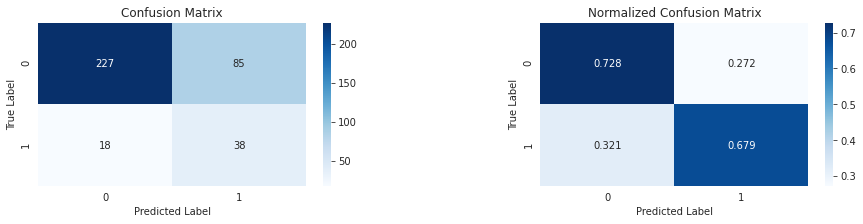

-------------------------
Classification Report
-------------------------
              precision    recall  f1-score   support

         0.0       0.93      0.73      0.82       312
         1.0       0.31      0.68      0.42        56

    accuracy                           0.72       368
   macro avg       0.62      0.70      0.62       368
weighted avg       0.83      0.72      0.76       368



In [28]:
lm_final_model = randomized_model.best_estimator_
y_pred_lm = lm_final_model.predict(x_test)
plt_cnf_matrix(y_test, y_pred_lm)

In [29]:
probs = lm_final_model.predict_proba(x_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score for Logistic Regression : %.3f' % logit_roc_auc)

AUC score for Logistic Regression : 0.799


### Random Forest 

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

#####  parameters

**n_estimators** : The number of trees in the forest.

**criterion** : The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

**max_depth** : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_split**: The minimum number of samples required to split an internal node.

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

**max_features**: The number of features to consider when looking for the best split.

**max_leaf_nodes**: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

**bootstrap**: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.

In [30]:
# Parameters
n_estimators = [50, 75, 100, 125, 150, 175]
max_depth = [5, 10, 15, 20, 25]
min_samples_split = [2,4,6,8,10]
min_samples_leaf = [1, 2, 3, 4]
max_features = ['auto', 'sqrt']

In [31]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

rm = RandomForestClassifier(class_weight = 'balanced',random_state = 7)
rm_random_model = RandomizedSearchCV(rm, random_grid, n_jobs=-1, cv = 10, verbose = 1, random_state = 42, scoring = 'roc_auc', iid = True)
rm_random_model.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.8s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
        

In [32]:
print('='*25)
print('Best Estimertor')
print('='*25)
print(rm_random_model.best_estimator_)
print('\n')

print('='*25)
print('Best Parameter')
print('='*25)
print(rm_random_model.best_params_)
print('\n')

print('='*25)
print('Best Score')
print('='*25)
print(rm_random_model.best_score_)

Best Estimertor
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)


Best Parameter
{'n_estimators': 75, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 10}


Best Score
0.8013165270490779


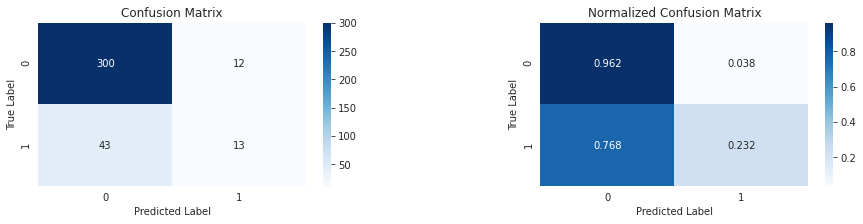

-------------------------
Classification Report
-------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92       312
         1.0       0.52      0.23      0.32        56

    accuracy                           0.85       368
   macro avg       0.70      0.60      0.62       368
weighted avg       0.82      0.85      0.83       368



In [33]:
rm_final_model = rm_random_model.best_estimator_
y_pred_rm = rm_final_model.predict(x_test)
plt_cnf_matrix(y_test, y_pred_rm)

In [34]:
rm_probs = rm_final_model.predict_proba(x_test) # predict probabilities
rm_probs = rm_probs[:, 1] # we will only keep probabilities associated with the employee leaving
rm_roc_auc = roc_auc_score(y_test, rm_probs) # calculate AUC score using test dataset
print('AUC score for Logistic Regression : %.3f' % rm_roc_auc)

AUC score for Logistic Regression : 0.772


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text major ticklabel objects>)

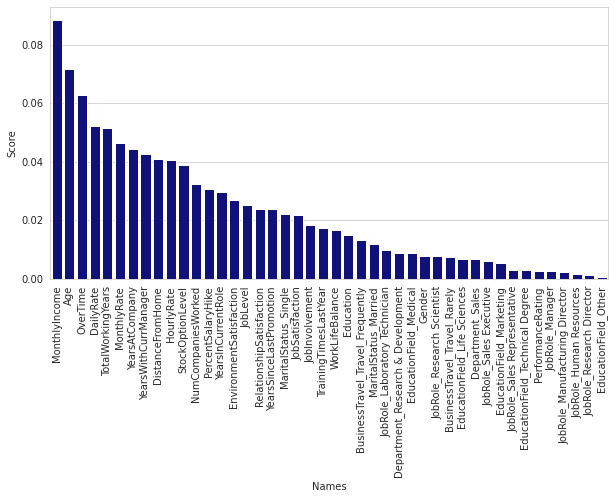

In [35]:
importances = rm_final_model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [x_train.columns[i] for i in indices]

fea = pd.DataFrame({
    'Names' : names,
    'Score' : importances[indices]    
})

plt.figure(figsize = (10,5))
sns.barplot(x = 'Names', y = 'Score', data = fea, color = 'darkBlue')
plt.xticks(rotation = 90)